<a href="https://colab.research.google.com/github/hayoungmk/dsc_project/blob/main/ch3/ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.1 sin함수 예측하기

#### 가중치 랜덤하게 적용한 sin함수

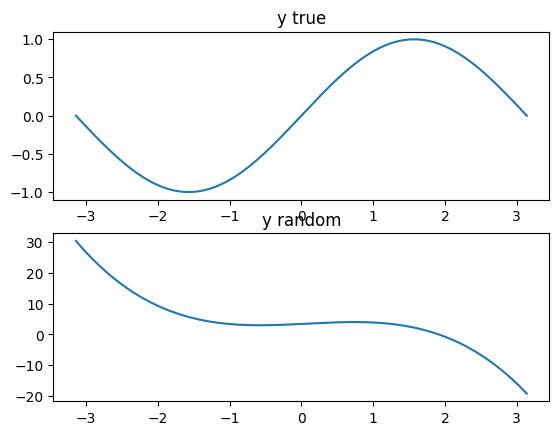

In [ ]:
# 학습하기 전 sin함수

import math
import torch
import matplotlib.pyplot as plt               # 시각화 모듈 임포트

x = torch.linspace(-math.pi, math.pi, 1000)   # -pi ~ pi 사이의 간격이 같은 점 1000개 추출

y = torch.sin(x)                              # 실제 sin함수 반환

# 예측 sin함수에 사용할 임의의 가중치(계수=4개)추출
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

y_random = a*x**3 + b*x**2 + c*x + d          # 3차 다항식 정의(임의의 가중치로 만든 y값)

# 실제 y값으로 실제 sin함수
plt.subplot(2,1,1)                            # subplot(행,열,번) : 행,열,번의 위치에 그래프 지정
plt.title("y true")
plt.plot(x,y)                                 # plot(입력,출력) : 그래프를 그림


# 임의의 가중치로 만든 y값으로 예측 sin함수
plt.subplot(2,1,2)
plt.title("y random")
plt.plot(x,y_random)

# 실제와 예측 sin함수 출력
plt.show()

#### 가중치 학습시킨 sin함수

epoch1  loss:14248.1826171875
epoch101  loss:4073.978271484375
epoch201  loss:3424.1484375
epoch301  loss:2879.6298828125
epoch401  loss:2421.86328125
epoch501  loss:2037.0177001953125
epoch601  loss:1713.4691162109375
epoch701  loss:1441.448486328125
epoch801  loss:1212.744384765625
epoch901  loss:1020.4556884765625
epoch1001  loss:858.7808227539062
epoch1101  loss:722.8441162109375
epoch1201  loss:608.5460205078125
epoch1301  loss:512.4400024414062
epoch1401  loss:431.62908935546875
epoch1501  loss:363.6777038574219
epoch1601  loss:306.5386962890625
epoch1701  loss:258.4910888671875
epoch1801  loss:218.08767700195312
epoch1901  loss:184.11163330078125


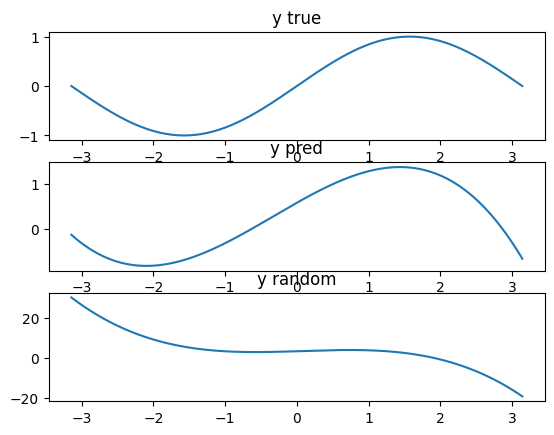

In [ ]:
learning_rate = 1e-6                    # 학습률

for epoch in range(2000):               # 학습 2000번 진행
  y_pred = a*x**3 + b*x**2 + c*x + d

  loss = (y_pred - y).pow(2).sum().item() # 손실

  if epoch % 100 == 0:
    print(f"epoch{epoch+1}  loss:{loss}")


  grad_y_pred = 2.0 * (y_pred - y)        # 기울기의 미분값
  grad_a = (grad_y_pred * x ** 3).sum()
  grad_b = (grad_y_pred * x ** 2).sum()
  grad_c = (grad_y_pred * x).sum()
  grad_d = grad_y_pred.sum()


  a -= learning_rate * grad_a             # 가중치 업데이트
  b -= learning_rate * grad_b
  c -= learning_rate * grad_c
  d -= learning_rate * grad_d


# 실제 y값으로 실제 sin함수
plt.subplot(3,1,1)
plt.title("y true")
plt.plot(x,y)


# 예측한 가중치의 sin함수
plt.subplot(3,1,2)
plt.title("y pred")
plt.plot(x,y_pred)


# 임의의 가중치로 만든 y값으로 예측 sin함수
plt.subplot(3,1,3)
plt.title("y random")
plt.plot(x,y_random)

# 실제와 예측 sin함수 출력
plt.show()

# 3.2 보스턴 집값 예측하기 : 회귀 분석

In [ ]:
!pip install tensorflow scikit-learn tqdm

#### 3.2.1 데이터 살펴보기

In [ ]:
# 데이터셋의 윤리적 문제로 인해 load_boston함수 제공 안 함 > 다른 데이터셋으로 대체

from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()

print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


#### 3.2.2 데이터 불러오기

In [ ]:
import pandas as pd

from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
dataFrame = pd.DataFrame(dataset["data"])       # 데이터셋의 데이터 불러오기
dataFrame.columns = dataset["feature_names"]    # 특징 이름 불러오기
dataFrame["target"]=dataset["target"]           # 데이터프레임에 정답 추가

print(dataFrame.head())                         # 데이터프레임 요약해서 출력

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


#### 3.2.3 모델 정의 및 학습하기

In [ ]:
import torch
import torch.nn as nn

from torch.optim.adam import Adam

X = dataFrame.iloc[:, :-1].values     # 모든 특징 사용 (마지막 열 제외)
Y = dataFrame["target"].values

# 모델 정의
model = nn.Sequential(
    nn.Linear(X.shape[1],100),        # 캘리포니아 주택 데이터셋 - 입력 : 데이터 프레임의 모든 열
    nn.ReLU(),
    nn.Linear(100,1)
)

batch_size = 100
learning_rate = 0.01

# 가중치를 수정하는 최적화 함수
optim = Adam(model.parameters(), lr=learning_rate)

# 에포크 반복
for epoch in range(200):

  # 배치 반복
  for i in range(len(X)//batch_size):
    start = i * batch_size
    end = start + batch_size

    x = torch.FloatTensor(X[start:end])
    y = torch.FloatTensor(Y[start:end])

    optim.zero_grad()
    preds = model(x)
    loss = nn.MSELoss()(preds,y)
    loss.backward()
    optim.step()

  if epoch % 20 == 0:
    print(f"epoch{epoch}  loss:{loss.item()}")

epoch0  loss:1.2888938188552856
epoch20  loss:1.747912883758545
epoch40  loss:1.0476983785629272
epoch60  loss:1.080496072769165
epoch80  loss:1.072235107421875
epoch100  loss:1.0672849416732788
epoch120  loss:1.072606086730957
epoch140  loss:1.072625994682312
epoch160  loss:1.0726267099380493
epoch180  loss:1.0726267099380493


#### 3.2.4 모델 성능 평가하기

In [ ]:
prediction = model(torch.FloatTensor(X[0, :13]))
real = Y[0]
print(f"prediction: {prediction.item()}  real: {real}")

prediction: 2.798147201538086  real: 4.526



# 3.3 손글씨 분류하기 : 다중분류

#### 3.3.1 데이터 살펴보기

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:10<00:00, 933416.75it/s] 


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 133919.96it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1271802.47it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2715684.79it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

60000
10000


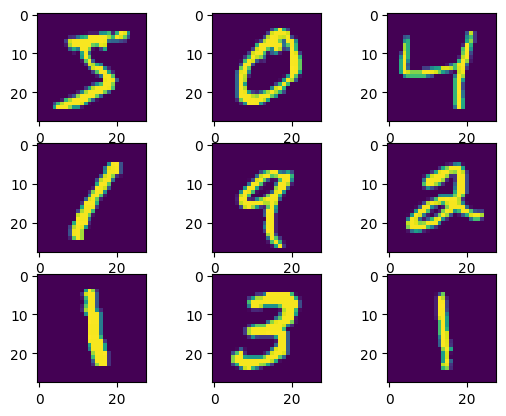

In [ ]:
import matplotlib.pyplot as plt

from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

# 학습용 데이터와 평가용 데이터 분리
training_data = MNIST(root="./", train=True, download=True, transform=ToTensor())
test_data = MNIST(root="./", train=False, download=True, transform=ToTensor())

print(len(training_data))
print(len(test_data))

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(training_data.data[i])
plt.show()

#### 3.3.2 데이터 불러오기

In [ ]:
from torch.utils.data.dataloader import DataLoader

train_loader = DataLoader(training_data, batch_size=32, shuffle=True)     # 학습용 데이터 섞기
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)         # 평가용 데이터 섞을 필요 없음

#### 3.3.3 모델 정의 및 학습하기

In [ ]:
import torch
import torch.nn as nn

from torch.optim.adam import Adam

# 학습에 사용할 프로세서 지정
device = "cuda" if torch.cuda.is_available() else "cpu"

model = nn.Sequential(
    nn.Linear(784, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64,10)
)
# 모델의 파라미터를 GPU로 보냄
model.to(device)

lr = 1e-3
optim = Adam(model.parameters(), lr=lr)

for epoch in range(20):
  for data, label in train_loader:
    optim.zero_grad()

    # 모델의 입력에 맞게 입력 데이터 모양 변환
    data = torch.reshape(data, (-1,784)).to(device)
    preds = model(data)

    loss = nn.CrossEntropyLoss()(preds, label.to(device))   # 손실계산
    loss.backward()   # 오차 역전파
    optim.step()      # 최적화

  print(f"epoch{epoch+1}  loss:{loss.item()}")


  # 모델을 MNIST.pth로 저장
  torch.save(model.state_dict(), "MNIST.pth")


epoch1  loss:0.14529408514499664
epoch2  loss:0.13299210369586945
epoch3  loss:0.01960442028939724
epoch4  loss:0.028001580387353897
epoch5  loss:0.07002706825733185
epoch6  loss:0.11565957963466644
epoch7  loss:0.10008110851049423
epoch8  loss:0.030950240790843964
epoch9  loss:0.035084888339042664
epoch10  loss:0.06280014663934708
epoch11  loss:0.00544356182217598
epoch12  loss:0.04503757879137993
epoch13  loss:0.0003940725582651794
epoch14  loss:0.02746289037168026
epoch15  loss:0.003223579842597246
epoch16  loss:0.020357968285679817
epoch17  loss:0.03990630432963371
epoch18  loss:0.0191987082362175
epoch19  loss:0.010227907449007034
epoch20  loss:0.0824984610080719


#### 3.3.4 모델 성능 평가하기

In [ ]:
# 모델 가중치 불러오기
model.load_state_dict(torch.load("MNIST.pth", map_location=device))

# 분류 성공한 전체 개수
num_corr = 0

with torch.no_grad():     # 기울기 계산하지 않음
  for data, label in test_loader:
    data = torch.reshape(data, (-1,784)).to(device)

    output = model(data.to(device))
    preds = output.data.max(1)[1]   # 모델의 예측값 계산(1차원(0~9)에서 가장 큰 값 반환)

    corr = preds.eq(label.to(device).data).sum().item()
    num_corr += corr

  # 분류 정확도
  print(f"Accuracy: {num_corr/len(test_data)}")

Accuracy: 0.9764
